609
1443
63
1947
45
98


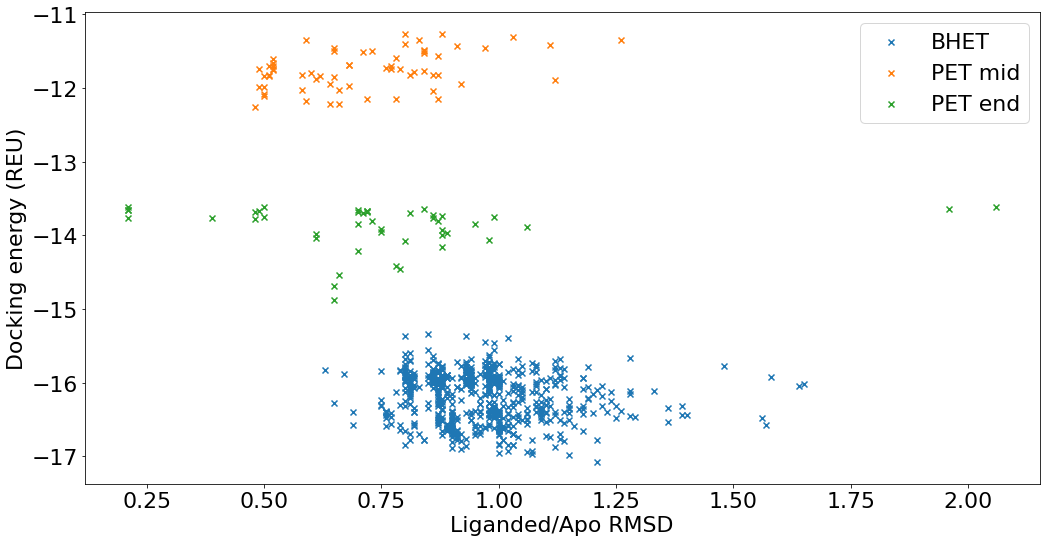

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import sys


scorefiles=[
            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_v2/filtered_designs.sc',
            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_mid_v2/filtered_designs.sc',
            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_end_v2/filtered_designs.sc'
#            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_mid_selected_no_movemap_v1/scorefile.sc',
#            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_selected_no_movemap_v1/scorefile.sc',
#            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_end_selected_no_movemap_v1/scorefile.sc'
        ]#sys.argv[1].split(',')

energy=[
            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_v2/design_interfaces_pre.sc',
            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_mid_v2/design_interfaces_pre.sc',
            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_end_v2/design_interfaces_pre.sc'    
    
]
pdbs=[
        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_v2/postprocessed_pdbs.txt',
        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_mid_v2/postprocessed_pdbs.txt',
        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_end_v2/postprocessed_pdbs.txt'
#        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_mid_selected_no_movemap_v1/filtered_pdbs.txt',
#        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_selected_no_movemap_v1/filtered_pdbs.txt',
#        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_end_selected_no_movemap_v1/filtered_pdbs.txt'


]#sys.argv[2]
legend_labels=['BHET','PET mid','PET end']#sys.argv[3].split(',')

LIGAND_ENERGY=64
LIGAND_RMSD=69
LIGAND_ENERGY_DES=4

def read_scorefile(line):
    line=list(line)
    line.pop()
    line=''.join(line)
    l=line.split(' ')
    split_line=[]
    for c in l:
        if c!='':
            split_line.append(c)
    return split_line

def read_scorefile_des(line):
    line.replace('SCORE: ','')
    line=list(line)
    line.pop()
    line=''.join(line)
    l=line.split(' ')
    split_line=[]
    for c in l:
        if c!='':
            split_line.append(c)
    return split_line


poses={}
for pdb in range(len(pdbs)):
    poses[legend_labels[pdb]]=[]
    with open(pdbs[pdb],'r') as p:
        for line in p:
            line=list(line)
            line.pop()
            line=''.join(line)
            poses[legend_labels[pdb]].append(line.replace('_relaxed_0001.pdb',''))
            poses[legend_labels[pdb]].append(line.replace('.pdb',''))            

been=[]
data={}
for scorefile in range(len(scorefiles)):
    with open(scorefiles[scorefile],'r') as sc:
        c=0
        for line in sc:
            rsc=read_scorefile(line)
            if c==0:
                data[legend_labels[scorefile]]={'Liganded/Apo RMSD':[],'Docking energy':[],'Docking energy IA':[]}
            else:
                if rsc[-1] in poses[legend_labels[scorefile]]:
                    data[legend_labels[scorefile]]['Liganded/Apo RMSD'].append(float(rsc[LIGAND_RMSD]))
                    data[legend_labels[scorefile]]['Docking energy'].append(float(rsc[LIGAND_ENERGY]))
                    #print(data)
            c=c+1
for scorefile in range(len(energy)):
    with open(energy[scorefile],'r') as sc:
        c=0
        for line in sc:
            rsc=read_scorefile_des(line)
            if c==0 and c==1:
                #data[legend_labels[scorefile]]['Docking energy IA']=[]
#                data[legend_labels[scorefile]]={'Liganded/Apo RMSD':[],'Docking energy':[]}
                #pass
                pass
            else:
#                print(rsc[-1])
                if (rsc[-1].replace('_relaxed_0001','') in poses[legend_labels[scorefile]])  and (rsc[-1] not in been):
#                    print(rsc[-1].replace('_relaxed_0001',''))
                    #data[legend_labels[scorefile]]['Liganded/Apo RMSD'].append(float(rsc[LIGAND_RMSD]))
                    data[legend_labels[scorefile]]['Docking energy IA'].append(float(rsc[LIGAND_ENERGY_DES]))
                    been.append(rsc[-1])
                    #print(data)
            c=c+1

        
#print(len(data['PET mid']))
#print(data)
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams.update({'font.size': 22})
for d in data.keys():
    print(len(data[d]['Liganded/Apo RMSD']))
    print(len(data[d]['Docking energy IA']))
#    print(len(data[d]['Docking energy']))
    plt.scatter(data[d]['Liganded/Apo RMSD'],data[d]['Docking energy'],label=d,alpha=1,marker='x')
plt.xlabel('Liganded/Apo RMSD')
plt.ylabel('Docking energy (REU)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
plt.tight_layout()
plt.show()

Comparing the distance distribution between ligand and catalytic Serine

1443
2.47267746925354 	 2.896888038472673 	 3.1833150386810303
BHET 	 output/BHET_v2/PDB/1cex_BHET_c_5_539_relaxed_0001.pdb 	 3.085672616958618
BHET 	 output/BHET_v2/PDB/1cex_BHET_c_5_228_relaxed_0001.pdb 	 3.0909337997436523
2171
3.552671432495117 	 4.813463878104457 	 7.349636077880859
PET mid 	 output/PET_mid_v2/PDB/1cex_PET_mid_c_11_98_relaxed_0001.pdb 	 3.552671432495117
1546
3.6513640880584717 	 5.902176955847351 	 19.12582015991211
PET end 	 output/PET_end_v2/PDB/1cex_PET_end_c_15_370_relaxed_0001.pdb 	 3.6513640880584717


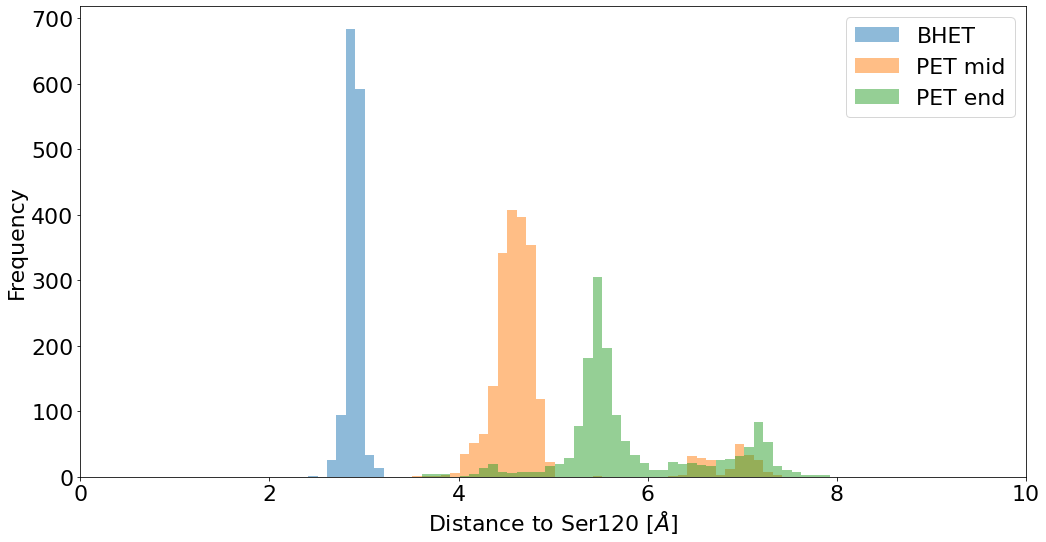

In [11]:
import json
import numpy as np
jsonfiles=[
            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_v2/BHET_filtered.json',
            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_mid_v2/PET_mid_filtered.json',
            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_end_v2/PET_end_filtered.json'
           ]#sys.argv[1].split(',')
legend_labels=['BHET','PET mid','PET end']#sys.argv[3].split(',')

def get_best_hit(d,l):
    for i in d.keys():
        if l=='BHET':
            if round(d[i],2)==3.09:
                print('BHET','\t',i,'\t',d[i])
        elif l=='PET mid':
            if round(d[i],2)==3.55:
                print('PET mid','\t',i,'\t',d[i])
        elif l=='PET end':
            if round(d[i],2)==3.65:
                print('PET end','\t',i,'\t',d[i])
            

data={}
fig, ax = plt.subplots( nrows=1, ncols=1 )
bins = np.linspace(0, 30, 300)
for j in range(len(jsonfiles)):
    with open(jsonfiles[j]) as json_file:
        d=json.load(json_file)
        print(len(d.values()))
        print(min(d.values()),'\t',np.mean(list(d.values())),'\t',max(d.values()))
        get_best_hit(d,legend_labels[j])
        ax.hist(d.values(),bins=bins,label=legend_labels[j],alpha=0.5)
#ax.set_xlabel(r'Ser-OH <-> RO-C=O distance [$\AA$]')
ax.set_xlabel(r'Distance to Ser120 [$\AA$]')
plt.xlim(0,10)
ax.set_ylabel('Frequency')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
plt.tight_layout()
plt.show()



Comparing designed sequences with the references

Searching for correlating 

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import sys


scorefiles=[
            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_ref_v4/.sc',
#            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_mid_v2/filtered_designs.sc',
#            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_end_v2/filtered_designs.sc'
#            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_mid_selected_no_movemap_v1/scorefile.sc',
#            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_selected_no_movemap_v1/scorefile.sc',
#            '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_end_selected_no_movemap_v1/scorefile.sc'
        ]#sys.argv[1].split(',')
pdbsT20=[
         '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_ref_v4/experimentalpdbs.txt',
#        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_v2/postprocessed_pdbs.txt',
#        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_mid_v2/postprocessed_pdbs.txt',
#        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_end_v2/postprocessed_pdbs.txt'
#        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_mid_selected_no_movemap_v1/filtered_pdbs.txt',
#        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_selected_no_movemap_v1/filtered_pdbs.txt',
#        '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/PET_end_selected_no_movemap_v1/filtered_pdbs.txt'


]#sys.argv[2]

pdbsT40=[
         '/home/ubuntu/Thesis/RosettaDesign/small_molecule_interface_design/enzdes/output/BHET_ref_v4/experimentalpdbs.txt'
]
legend_labels=['BHET','PET mid','PET end']#sys.argv[3].split(',')

LIGAND_ENERGY=64
LIGAND_RMSD=69

T20=[
    0.000727109,
    0.002927106,
    0.001456557,
    0.005195388,
    0.001248671,
    0.005168168,
    0.001255337
]


T40=[
    0.00216732,
    0.002222776
    0.007350216,
    0.001989,
    0.005168168,
    0.001255337
]

def read_scorefile(line):
    line=list(line)
    line.pop()
    line=''.join(line)
    l=line.split(' ')
    split_line=[]
    for c in l:
        if c!='':
            split_line.append(c)
    return split_line

poses={}
for pdb in range(len(pdbs)):
    poses[legend_labels[pdb]]=[]
    with open(pdbs[pdb],'r') as p:
        for line in p:
            line=list(line)
            line.pop()
            line=''.join(line)
            poses[legend_labels[pdb]].append(line.replace('_relaxed_0001.pdb',''))
            poses[legend_labels[pdb]].append(line.replace('.pdb',''))            


data={}
for scorefile in range(len(scorefiles)):
    with open(scorefiles[scorefile],'r') as sc:
        c=0
        for line in sc:
            rsc=read_scorefile(line)
            if c==0:
                data[legend_labels[scorefile]]={'Liganded/Apo RMSD':[],'Docking energy':[]}
            else:
                if rsc[-1] in poses[legend_labels[scorefile]]:
                    data[legend_labels[scorefile]]['Liganded/Apo RMSD'].append(float(rsc[LIGAND_RMSD]))
                    data[legend_labels[scorefile]]['Docking energy'].append(float(rsc[LIGAND_ENERGY]))
                    #print(data)
            c=c+1
#print(len(data['PET mid']))
#print(data)
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams.update({'font.size': 22})
for d in data.keys():
    print(len(data[d]['Liganded/Apo RMSD']))
#    print(len(data[d]['Docking energy']))
    plt.scatter(data[d]['Liganded/Apo RMSD'],data[d]['Docking energy'],label=d,alpha=1,marker='x')
plt.xlabel('Liganded/Apo RMSD')
plt.ylabel('Docking energy (kcal/mol)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
plt.tight_layout()
plt.show()